# Clase 3 : Numpy

**Numpy** (de Numerical Python) es la principal librería de cálculo numérico de Python y el ecosistema de librerías
científicas del lenguaje (como Pandas y Matplotlib) recurre a Numpy para realizar sus operaciones.
Se basa en una **estructura de datos multidimensional llamada array** y en una serie de funciones muy optimizadas para su manipulación, incluyendo operaciones matemáticas, lógicas, de selección y ordenamiento, operaciones estadísticas, álgebra lineal y más.

## Numpy 1 

### Atributos de un array
<ul>
<li>dtype: el tipo de dato del array, en general numérico.</li>
<li>size: cantidad de elementos.</li>
<li>nbytes: total de bytes consumidos por los datos
(bytes del tipo de dato por la cantidada de elementos).</li>
<li>ndim: número de dimensiones.</li>
<li>shape: cantidad de elementos en cada dimensión.</li>
<li>strides: cantidad de bytes  para moverse una posicion en cada dimension </li>
</ul>

### Tipos de datos
Es uno de los atributos fundamentales de un array.
El tipo de dato se define cuando se crea el array.
Una vez creado, no es posible cambiar el tipo de dato del mismo, a lo sumo es posible crear otro array en base al original.
Tiene tipos de datos numéricos de distinta precisión; datetime64 y timedelta para trabajar con fechas, horas y diferencias de tiempo. También tiene el tipo de dato object que crea referencias a cualquier tipo de objeto de Python (como strings). Los objetos no son almacenados en el array, sólo las referencias.

### Creación de arrays
Hay muchas formas de crear arrays. A través de la función np.array se pueden usar secuencias como listas (que pueden estar anidadas
para representar arreglos multidimensionales). Podemos pasar el parámetro dtype para forzar a representar los datos en un tipo determinado. Si no se pasa, la función tratará de inferirlo.

In [2]:
import numpy as np
array1 = np.array([1,2,3,4,5])
array2 = np.array([1,2,3,4,5], dtype=np.float64)
array3 = np.array([1,2,3,4,5], dtype=np.int8)

print(array1, array1.dtype, array1.nbytes)
print(array2, array2.dtype, array2.nbytes)
print(array3, array3.dtype, array3.nbytes)
#Notar que los flotantes se imprimen con un punto y que el array de enteros de 8 bits ocupa 8 veces menos espacio en memoria.

[1 2 3 4 5] int64 40
[1. 2. 3. 4. 5.] float64 40
[1 2 3 4 5] int8 5


Podemos armar un array de **dos dimensiones** con listas anidadas, siempre y cuando todas tengan la **misma cantidad de elementos.**

In [3]:
array_2D = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
print(array_2D)
print("ndim:",array_2D.ndim, "- shape:", array_2D.shape)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
ndim: 2 - shape: (3, 4)


Además hay numerosas funciones para crear arrays:
<ul>

<li>arange y linspace para rangos de números equiespaciados.</li>
<li>zeros, ones y full para arrays de cualquier dimensión y forma.</li>
<li>identity, eye y diagonal para arrays de 2 dimensiones.</li>
<li>El módulo random permite crear arrays con distintas distribuciones de números al azar.</li>
<li>Las funciones loadtxt y genfromtxt permiten leer archivos de texto tipo csv.</li>

</ul>
**Tener en cuenta especificar el tipo de dato y el shape cuando sea necesario**

### Reshaping
Ya vimos que el tipo de dato es muy importante en un array. Ahora nos vamos a centrar en el atributo **shape** Éste determina la forma del array, lo que implica la dimensión y el paso.
Los datos se almacenan en un espacio contiguo de memoria y el shape determina cómo debe ser interpretada la **forma del array**: cuántos elementos debe contener cada dimensión. Se especifica como una tupla de números enteros.
Estos números deben ser compatibles con la cantidad de elementos.
Para cambiar la forma del array se usa el método reshape. El método **flatten** transforma el array en **unidimensional.**

### Indexing
Se conoce como indexing a cualquier operación que **seleccione elementos de una array** a través de corchetes ([]).
Para un array unidimensional la indexación funciona igual que con las listas. Sin embargo, **para los arrays multidimensionales es posible especificar los índices de cada dimensión** dentro de los mismos corchetes.

In [17]:
array_3x3=np.array([[1,2,3],[4,5,6],[7,8,9]])
print("ALGUNOS EJEMPLOS")
print(array_3x3)
print("\nEJEMPLO [:2,1:]")
print(array_3x3[:2,1:])
print("\nEJEMPLO [2]")
print(array_3x3[2])
print("\nEJEMPLO [2,:]")
print(array_3x3[2,:])
print("\nEJEMPLO [2:,:]")
print(array_3x3[2:,:])
print("\nEJEMPLO [:,:2]")
print(array_3x3[:,:2])
print("\nEJEMPLO [1,:2]")
print(array_3x3[1,:2])
print("\nEJEMPLO [1:2,:2]")
print(array_3x3[1:2,:2])

ALGUNOS EJEMPLOS
[[1 2 3]
 [4 5 6]
 [7 8 9]]

EJEMPLO [:2,1:]
[[2 3]
 [5 6]]

EJEMPLO [2]
[7 8 9]

EJEMPLO [2,:]
[7 8 9]

EJEMPLO [2:,:]
[[7 8 9]]

EJEMPLO [:,:2]
[[1 2]
 [4 5]
 [7 8]]

EJEMPLO [1,:2]
[4 5]

EJEMPLO [1:2,:2]
[[4 5]]


Una característica interesante de Numpy es que permite **seleccionar elementos en base a una condición.** Esto es posible porque se puede usar un array de booleanos para seleccionar elementos de otro array, lo que se conoce como **enmascaramiento.**

In [18]:
numeros= np.array([10,20,30,40])
booleanos = np.array([True,False, False, True])
numeros[booleanos]

array([10, 40])

Para construir arrays de booleanos se pueden usar expresiones condicionales con el mismo array (lo que profundizaremos más
adelante). Luego, estos arrays se pueden usar para seleccionar elementos para los que se verifique la condición

In [19]:
arr= np.array([10,20,30,40,50])
arr > 30

array([False, False, False,  True,  True])

In [20]:
arr[arr>20]

array([30, 40, 50])

### Asignaciones
Con la notación de corchetes no sólo es posible elegir elementos de un array, sino que también se puede **reasignar sus valores.**

In [22]:
b = np.array([[1,2,3,4],[5,6,7,8]])
b[:,2]=0
b

array([[1, 2, 0, 4],
       [5, 6, 0, 8]])

## Numpy 2

### Vectorización
Numpy ofrece la posibilidad de realizar operaciones ***sobre todos los elementos de los arrays sin la necesidad
de recurrir a bucles.*** Esto es lo que se conoce como vectorización. Internamente, Numpy utiliza rutinas muy optimizadas escritas en C, que implementan estas operaciones.
Esta es una de las características esenciales de Numpy. Libera al programador de los detalles de implementación y resulta en código muy compacto y legible.

### Operaciones aritméticas
Los operadores aritméticos de Python también están implementados para operar con arrays.
Estos operadores trabajan elemento a elemento y **devuelven como resultado un nuevo array.**
Además de los operadores a los que estamos acostumbrados, también existen **funciones** correspondientes. 
Por ejemplo, para la suma existe el operador + y la función add. De modo que a+b es equivalente a np.add(a,b)

In [24]:
x=np.array([1,2,3,4])
y=np.array([1,4,12,20])
x/y

array([1.  , 0.5 , 0.25, 0.2 ])

In [25]:
a=np.array([[0,1,2,3],[4,5,6,7]])
b=np.array([[0,20,40,60],[10,30,50,70]])
a+b

array([[ 0, 21, 42, 63],
       [14, 35, 56, 77]])

Podemos operar un array con un numero, realizando una operacion sobre todos sus elementos:
    

In [27]:
x*10

array([10, 20, 30, 40])

In [28]:
x^2+y+2

array([ 4, 10, 19, 28])

### Funciones matemáticas
Así mismo existen numerosas funciones para realizar operaciones matemáticas elemento a elemento.
<ul>
● Funciones trigonométricas (sin, cos, tan, arcsin, tanh, etc.)<br>
● Logarítmicas (log, log2, log10, etc)<br>
● Exponenciales (exp, exp2, expm1, etc.)<br>
● Potenciales (square, sqrt, cbrt, reciprocal, etc.)<br>
● Redondeo de decimales (round, rint, trunc, floor, ceil, etc.)<br>
● Y muchas otras.
</ul>

In [45]:
#Creamos el array x como un rango lineal equiespaciado de n números entre x0 y x1.
x0=0.01
x1=1
n=60
x=np.linspace(x0,x1,n)

In [47]:
y=np.log(x)-4*x

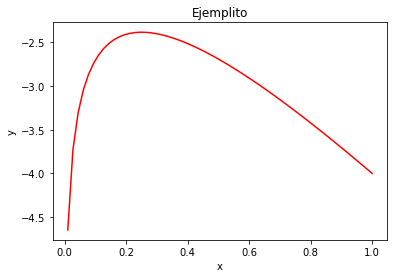

In [50]:
import matplotlib.pyplot as plt
plt.plot(x,y,color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ejemplito')
plt.show()

### Broadcasting
Se conoce como broadcasting a la capacidad de **operar entre arrays de distinta forma o dimensión** (con ciertas restricciones).
En ciertas condiciones, Numpy es capaz de promover la forma del array más pequeño a la del array más grande.
La regla es que para que dos dimensiones sean **compatibles** ambas deben ser iguales o una de ellas debe ser 1 (la dimensión que se promueve)

In [57]:
array3_3=np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
array1_3=np.array([10,10,10])
array3_3 + array1_3

array([[11, 12, 13],
       [14, 15, 16],
       [17, 18, 19],
       [20, 21, 22]])

Cuando operamos un número con un array también se está aplicando broadcasting

In [58]:
100*array1_3

array([1000, 1000, 1000])

### Operaciones lógicas
Así como es posible usar los operadores aritméticos con arrays, también es posible usar los **operadores de comparación**. 
En este caso, se **devuelve un array de booleanos** que son el resultado de aplicar lascomparaciones elemento a elemento

In [60]:
array_a=np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
array_b=np.array([[7,8,9],[4,5,6],[7,8,9],[4,5,6]])
array_a < array_b

array([[ True,  True,  True],
       [False, False, False],
       [False, False, False],
       [False, False, False]])

Esto es de gran utilidad porque, como vimos, se puede usar un array de booleanos para seleccionar elementos.
La siguiente expresión devuelve los elementos de a que son menores que el correspondiente elemento de b.

In [61]:
array_a[array_a < array_b]

array([1, 2, 3])

Para poder realizar operaciones lógicas entre arrays de booleanos hay que usar ciertas funciones o los **operadores
especiales** correspondientes:



<table >

<thead>    
<tr>
<th>Funcion</th>
<th>Operador</th>
</tr>
</thead>    

<tbody>     
<tr>
<td>np.logical_and</td>
<td>&</td>
</tr>
  
<tr>
<td>logical_or</td>
<td>|</td>
</tr>

<tr>
<td>logical_not</td>
<th>~</th>
</tr> 
    
<tr>    
<td>logical_xor</td>
<td>^</td>
</tr>
</tbody>  
    
</table>


Así podemos combinar varias condiciones en un solo filtro. La siguiente expresión devuelve los elementos de a que son menores que el correspondiente
elemento de b, en donde el elemento de b es par.

In [66]:
# Importante : Los operadores lógicos y de comparación no tienen un orden de precedencia en expresiones con arrays
# sino que se realizan en el orden en el que son escritos. Para que la expresión funcione correctamente
# hay que encerrar cada parte entre paréntesis. La siguiente expresión (que no encierra las comparaciones entre 
# paréntesis) falla.
array_a[(array_a < array_b )& (array_b%2==0)]

array([2])

## Numpy 3

### Funciones de agregación
Hemos visto que contamos con numerosas funciones para hacer operaciones elemento a elemento. Pero también contamos con lo que se conoce como funciones de agregación (o de reducción) cuya característica es que toman un conjunto de números y devuelven sólo un número. La suma de todos los números de un array es un caso típico.
Gracias a estas funciones es que vamos a poder realizar estadísticas sobre el conjunto de datos

#### Suma
Suma de todos los elementos del array: **sum()**

In [79]:
a=np.array([[6,1,13],[7,15,11],[19,0,11]])
print("El array: \n", a)
print("La suma de sus elementos calculados con np.sum(array): \n", np.sum(a))
print("La suma de sus elementos calculados con array.sum()): \n",a.sum())

El array: 
 [[ 6  1 13]
 [ 7 15 11]
 [19  0 11]]
La suma de sus elementos calculados con np.sum(array): 
 83
La suma de sus elementos calculados con array.sum()): 
 83


#### Promedio y desviación standard
El **promedio (o media aritmética)** se puede considerar como el valor más representativo de una distribución de
números. Es la suma de todos los números dividido la cantidad de números:
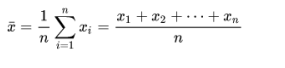

La **desviación standard** es una medida de la **dispersión de los datos en torno al valor promedio**:
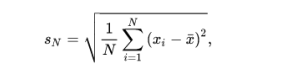

Podemos usar **mean y std para calcular el promedio y la desviación standard** de los números de un array.
En el siguiente ejemplo generamos n números aleatorios con distribución gaussiana. A medida que aumenta n, el
promedio y la desviación se acercan a mu y sigma.

In [81]:
n=100
mu = 8
sigma = 2 
nums = mu + sigma * np.random.randn(n)

print(nums)
print(nums.mean())
print(nums.std())

[ 8.38999832 10.03741147  9.11479012  7.54815893  8.95965424  6.99478405
  7.90236626  7.16826341  6.84252895  6.70161422  8.04497168 10.32839319
  9.8130683  13.35401847  9.63544792  6.34135561  9.5447675   7.95047091
  6.2655693   5.26896123  8.16437869  8.28236802  6.63378813  7.54834673
  9.04918713  5.73064562  9.48212286 10.23448555 11.45814224  8.68405446
 11.19144912  7.70028719  8.41803698 10.46644155  8.42868636  5.35361808
 11.19191149  6.96159142  7.14769814  7.07561942  9.88237855  7.55948072
  9.45883034  9.6365133   8.41718946  7.48518594  8.41329889  6.08417961
  8.28209834  6.30922259  7.61243961  5.34587307  6.97728551  7.89514191
 11.94052978  7.83975254  5.38112906  6.41328436  8.57061517  5.00019348
  4.62623911  5.6924362   7.74065433  6.1209228   6.80641953  6.55567077
  7.81467427  9.45143503  6.98770817  8.49829493  9.82491731  7.13704851
 10.4049475   6.73284458  6.45283852  5.19606329 10.04305861  6.08172108
 10.132349    8.38200384  9.78663509  5.93640907 13

#### Otras funciones
También encontramos las siguientes funciones:
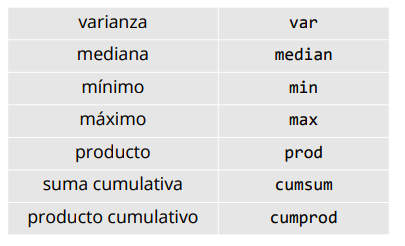 

#### Missing values
¿Qué sucede con estas funciones y métodos cuando el array tiene missing values?
Están diseñadas para para propagar el valor al resultado final.
Para **ignorar los missing values** se deben usar las funciones **nansum, nanprod, nanmean, nanstd, nanvar, nanmin,
nanmax, etc.** Estas funciones no tienen métodos equivalentes. 

In [86]:
a= np.array([1,1,1,np.NaN,1,1])
a.mean(), np.max(a), np.min(a), a.sum()

(nan, nan, nan, nan)

In [88]:
np.nanmean(a), np.nanmax(a), np.nanmin(a), np.nansum(a)

(1.0, 1.0, 1.0, 5.0)

#### Operando sobre ejes
Estas funciones, en principio, calculan el resultado con todos los elementos del array. Sin embargo, es posible
controlar su comportamiento para que calculen los resultados sobre alguno de los ejes. Por ejemplo, en
un array de dos dimensiones podemos calcular el promedio de todas las filas o de las columnas.
Esto se consigue usando el **parámetro axis, que determina la dimensión a recorrer.**
En nuestro ejemplo de una matriz, **axis = 0 calcula el promedio de todas las columnas (recorre las filas) y axis = 1 calcula el promedio de las filas (recorre las columnas).**
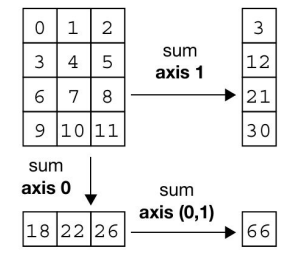

In [96]:
a= np.array([[0,1,2],[3,4,5],[6,7,8],[9,10,11]])
print("El promedio de las columnas es: \n",a.mean(axis=0))
print("La suma de las columnas es: \n ", a.sum(axis=0))
print("La minimo de cada columna es: \n ", a.min(axis=0))

El promedio de las columnas es: 
 [4.5 5.5 6.5]
La suma de las columnas es: 
  [18 22 26]
La minimo de cada columna es: 
  [0 1 2]


In [97]:
print("El promedio de las filas es: \n",a.mean(axis=1))
print("La suma de las filas es: \n ", a.sum(axis=1))
print("La minimo de cada fila es: \n ", a.min(axis=1))

El promedio de las filas es: 
 [ 1.  4.  7. 10.]
La suma de las filas es: 
  [ 3 12 21 30]
La minimo de cada fila es: 
  [0 3 6 9]


In [95]:
print("La suma de todo es:  \n",a.sum())


La suma de todo es:  
 66


**Ejemplo**
Supongamos que las ventas de algún producto durante cuatro semanas está en el array ventas. Cada fila es una semana y cada columna es un
día de la semana

In [102]:
ventas= np.array([[17,16,15,17,15],[15,2,11,15,14],[13,5,9,3,5],[8,16,12,15,7] ])
print("Las ventas de 4 semanas son: \n", ventas)
print("Promedio de ventas para cada dia de la semana:\n", ventas.mean(axis=0))
print("Total de ventas de cada semana:\n", ventas.sum(axis=1))

Las ventas de 4 semanas son: 
 [[17 16 15 17 15]
 [15  2 11 15 14]
 [13  5  9  3  5]
 [ 8 16 12 15  7]]
Promedio de ventas para cada dia de la semana:
 [13.25  9.75 11.75 12.5  10.25]
Total de ventas de cada semana:
 [80 57 35 58]


#### argmin y argmax
Si en lugar de querer encontrar el valor mínimo o máximo, queremos encontrar el índice del
elemento correspondiente podemos usar argmin y argmax, pero hay que tener en cuenta que devuelve el índice del array aplanado.

In [103]:
a= np.array([[1,2,4],[5,4,3],[8,4,999]])
a.argmax()

8

## Numpy 4

### Álgebra lineal
Numpy implementa muchas operaciones de álgebra lineal, como producto escalar entre vectores, producto matricial, cálculo de determinante, matriz inversa, etc

#### Producto escalar
Para realizar el producto escalar entre dos vectores (arrays unidimensionales) podemos usar el **método dot**. Para esta
operación también existe el operador @.

In [67]:
v=np.array([5,3,2,6])
w=np.array([1,2,0,8])
v.dot(w)

59

In [68]:
v@w

59

#### Producto matricial
El método dot y su correspondiente operador @ se pueden usar también para efectuar productos matriciales, en donde cada elemento de la nueva
matriz es el producto escalar de una fila de la primer matriz y una columna de la segunda. **La cantidad de columnas de la primer matriz debe
ser igual a la cantidad de filas de la segunda.**
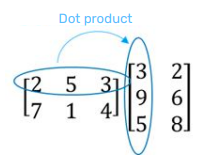

In [70]:
A=np.array([[2,5,3],[7,1,4]])
B=np.array([[3,2],[9,6],[5,8]])
A.dot(B)

array([[66, 58],
       [50, 52]])

#### Transpuesta
 Para obtenerla podemos usar el **método transpose o el atributo T.**

In [71]:
A.T

array([[2, 7],
       [5, 1],
       [3, 4]])

In [72]:
A.transpose()

array([[2, 7],
       [5, 1],
       [3, 4]])

#### Determinante 
Numpy tiene un módulo dedicado a álgebra lineal: el **módulo linalg**, donde se implementan
muchas funciones de álgebra lineal. Una de ellas es **det**, que calcula el determinante de una
matriz cuadrada.


In [73]:
M=np.array([[0,7,0],[0,2,6],[4,3,2]])
np.linalg.det(M)

167.99999999999997

#### Inversa
También podemos encontrar la inversa de una matriz cuadrada de determinante no nulo con la **función inv.**

In [74]:
np.linalg.inv(M)

array([[-0.08333333, -0.08333333,  0.25      ],
       [ 0.14285714,  0.        ,  0.        ],
       [-0.04761905,  0.16666667,  0.        ]])